>> There are many libraries for the purpose of image segmentation, in this coding example i am using scikit-image.

In [226]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

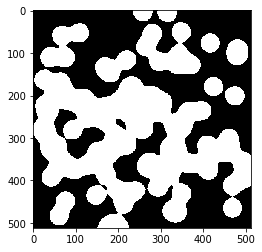

In [227]:
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

import color image 

In [228]:
image_color = data.astronaut()

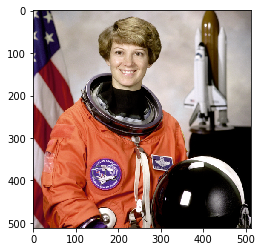

In [229]:
plt.imshow(image_color)

Importing an image from external source

The I/O module is used for this purpose

In [230]:
from skimage import io

In [231]:
image_external = io.imread('opera_house.jpg')

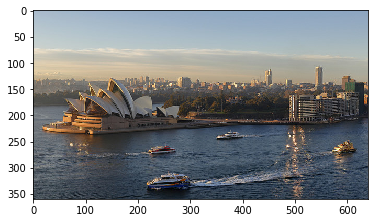

In [232]:
plt.imshow(image_external)

Loading Multiple Images

images = io.ImageCollection('../images/*.png:../images/*.jpg')

In [233]:
images = io.ImageCollection('C:/Users/Haier/Dataset/vasell_seg_datset/train/vessel/*.jpg')

In [234]:
print(type(images))

<class 'skimage.io.collection.ImageCollection'>


In [235]:
len(images)

20

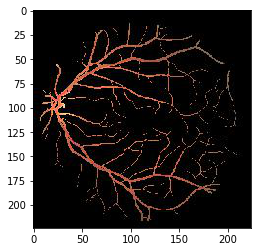

In [236]:
plt.imshow(images[0])

In [237]:
images[0].shape

(224, 224, 3)

Saving an image

In [238]:
io.imsave('save_image.jpg',images[0])

In [239]:
saved_image_load = io.imread("save_image.jpg")

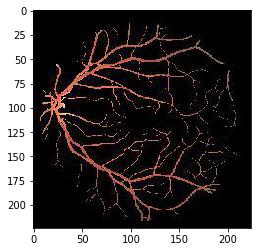

In [240]:
plt.imshow(saved_image_load)

#### Image Segmentation: It is defined as partioning the images into different segments to make the image more informative so we can get useful information from the image 

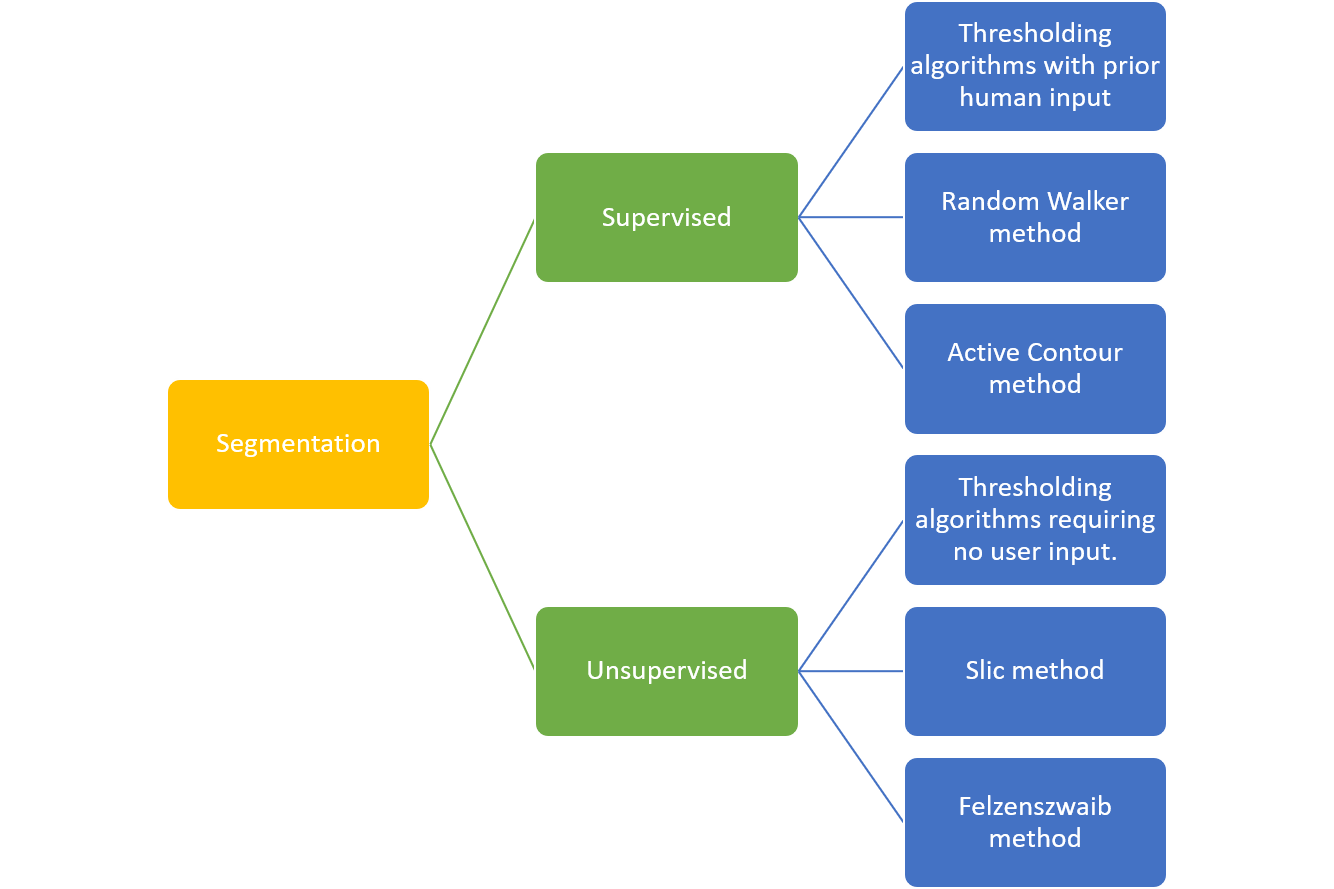

#### Supervised segmentation: 
Some prior knowledge, possibly from human input, is used to guide the algorithm.

#### Unsupervised segmentation:
No prior knowledge is required. These algorithms attempt to subdivide images into meaningful regions automatically. The user may still be able to tweak certain settings to obtain desired outputs.

 #### (1)
 #### Thresholding:
 It is the simplest way to segment objects from a background by choosing pixels above or below a certain threshold.

In [241]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

Function to plot images

In [242]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,14))
    
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig,ax

In [243]:
#Image load and display 
text = data.page()

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28ccb451be0>)

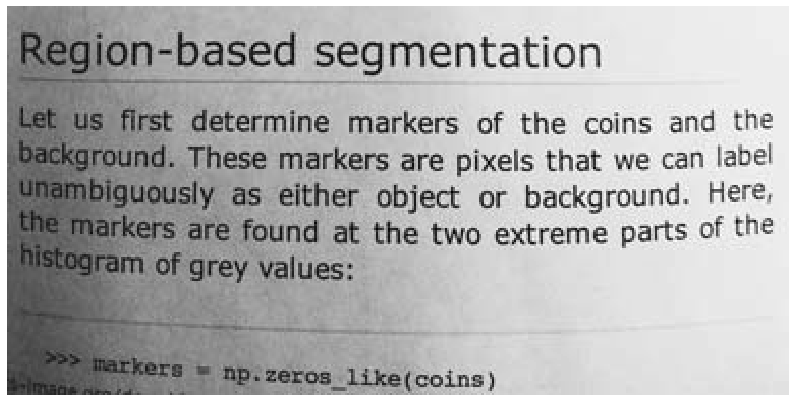

In [244]:
image_show(text)

to do segmentation for above image we use histogram for thresholding

(0, 255)

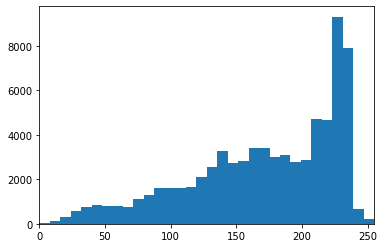

In [245]:
fig,ax = plt.subplots(1,1)
ax.hist(text.ravel(), bins=32, range=[0,255])
ax.set_xlim(0,255)

In [246]:
print('actual size:',text.shape)
text.ravel() # used to flatten the array
print('flattened size:',text.ravel().shape)

actual size: (191, 384)
flattened size: (73344,)


In [247]:
?ax.hist

In the above histogram we can't get the exact point that clearly differntiate between two regions (ideal case)

Apply Supervised Thresholding to above example:
    lets choose we values by viewing histogram (60,80,130)

In [248]:
def mult_plot(image,num_plots,thres=70):
    next = thres
    for i in range(num_plots):

        text_segmented = image> next

        image_show(text_segmented)
        plt.title(f'for the threshold value of {next}')
        next= next+20
    

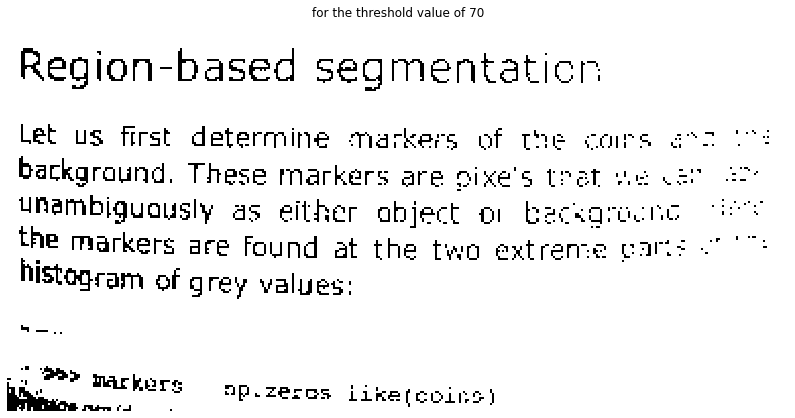

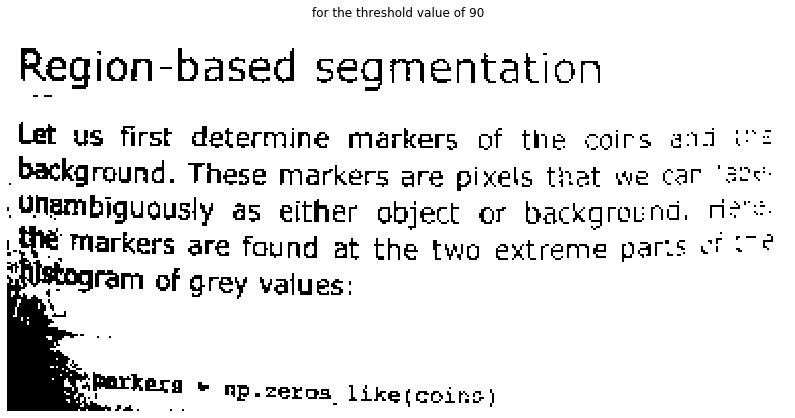

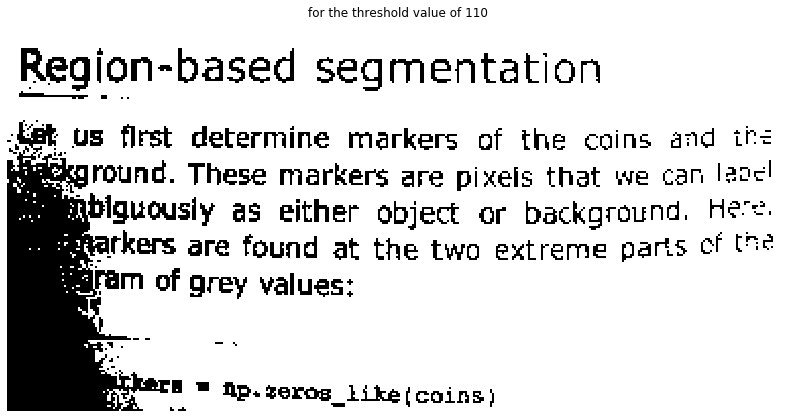

In [249]:
mult_plot(text,3)

Not able to clearly differentiate in above method.

#### Now, apply the unsupervised thresholding:
few methos are : otsu,li,local

In [250]:
text_un_thre_li = filters.threshold_li(text) # it gives threshold 
print('li unsupervised method threhold:', text_un_thre_li)
text_un_thre_ostu = filters.threshold_otsu(text) # it gives threshold 
print('otsu unsupervised method threhold:', text_un_thre_ostu)

li unsupervised method threhold: 146.0145745416638
otsu unsupervised method threhold: 157


In the case of local, we also need to specify the block_size . Offset helps to tune the image for better results.

In [251]:
text_un_thre_local = filters.threshold_local(text,block_size=51,offset=10) # it gives threshold 
print('local unsupervised method threhold:', text_un_thre_local)

local unsupervised method threhold: [[120.76183612 120.72644056 120.65805212 ... 228.83107861 228.8458391
  228.85319524]
 [120.61679212 120.58024805 120.50962112 ... 228.82833199 228.84312832
  228.85050301]
 [120.32885144 120.29001774 120.21492754 ... 228.82276788 228.83763529
  228.84504677]
 ...
 [ 53.01758569  53.04102733  53.08719542 ... 216.93491749 216.95354806
  216.9629317 ]
 [ 52.7833288   52.80688275  52.85326012 ... 216.86423818 216.88249846
  216.89169358]
 [ 52.66503108  52.68863505  52.73510478 ... 216.82843824 216.84651022
  216.85560947]]


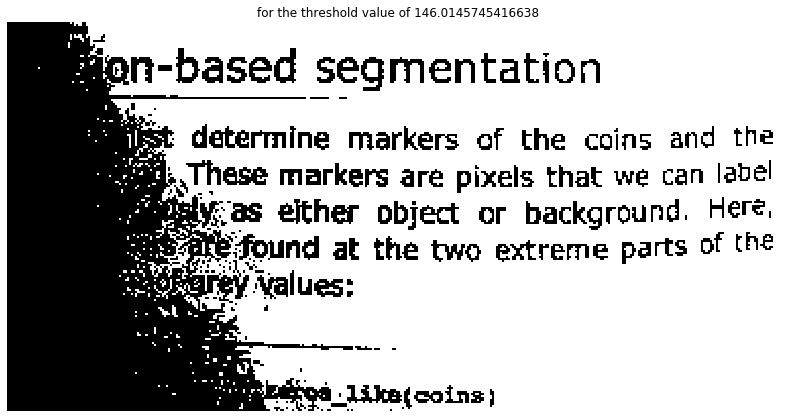

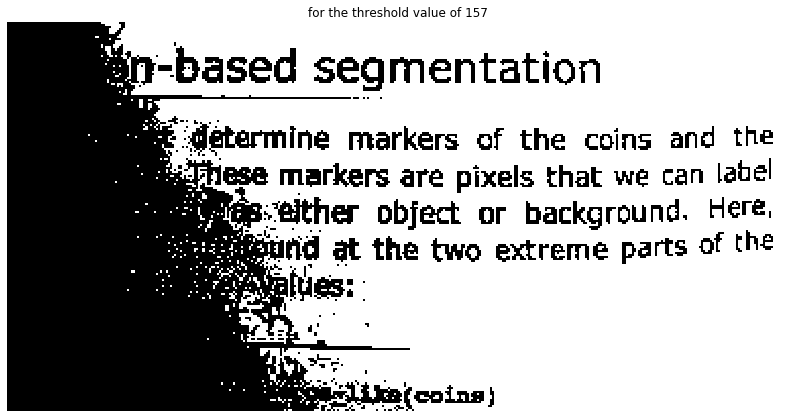

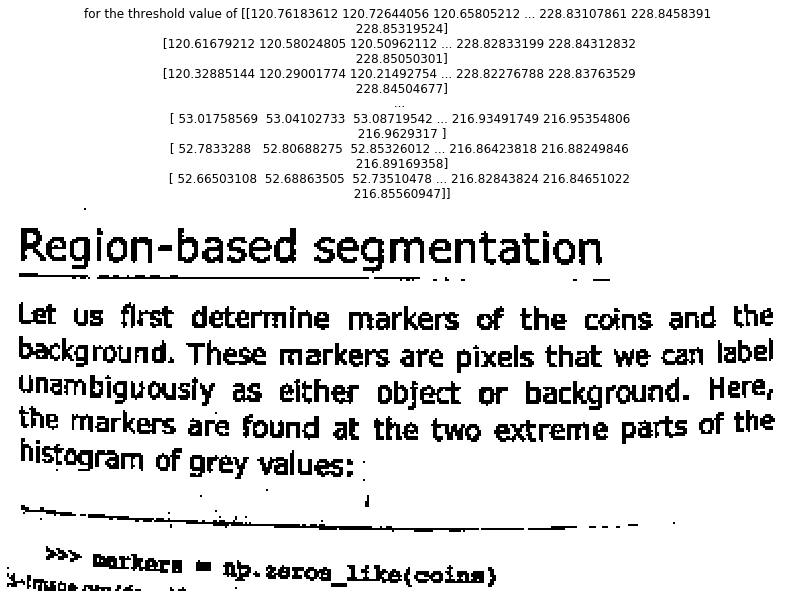

In [252]:
mult_plot(text,1,thres=text_un_thre_li)
mult_plot(text,1,thres=text_un_thre_ostu)
mult_plot(text,1,thres=text_un_thre_local)

In [253]:
?filters.threshold_local

Apply local method to vessel segmentation 

In [254]:
img_vesse = color.rgb2gray(io.imread('C:/Users/Haier/Dataset/vasell_seg_datset/train/unvessel/21_training.tif'))

img_vess_un_thre_local = filters.threshold_local(img_vesse,block_size=3) # it gives threshold 
print('local unsupervised method threhold:', img_vess_un_thre_local)

local unsupervised method threhold: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.03555606 0.03175534 0.02737275 ... 0.0269404  0.0269481  0.02764125]
 [0.02754144 0.02745775 0.02742985 ... 0.02714697 0.02714707 0.02340344]
 [0.02740883 0.02363514 0.02552146 ... 0.00034048 0.00413466 0.00413512]]


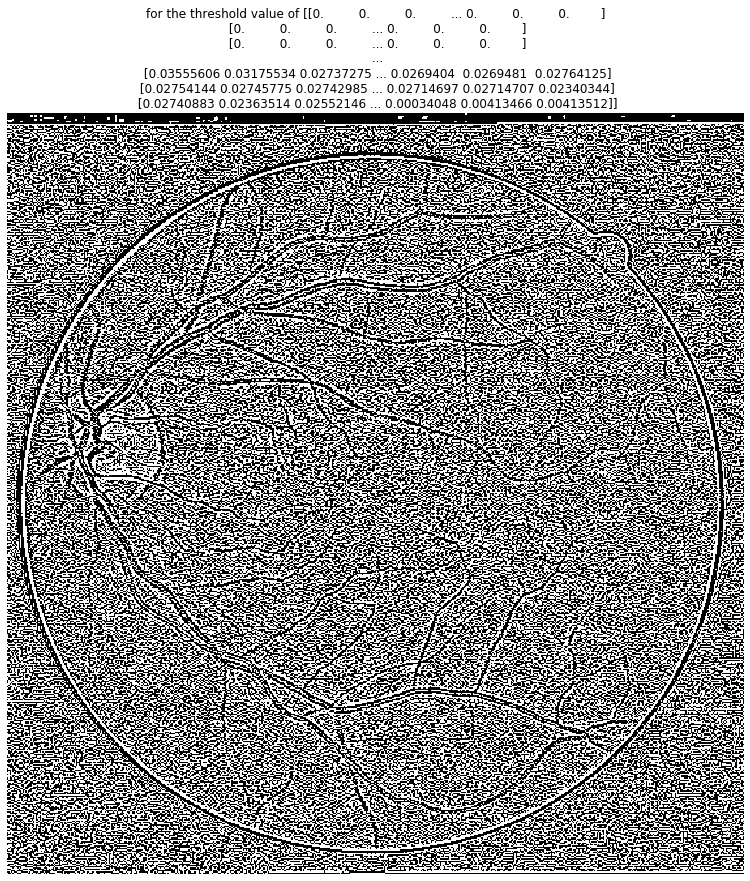

In [255]:
mult_plot(img_vesse,1,thres=img_vess_un_thre_local)

#### Analysis: 
Thresholding is a very basic segmentation process and will not work properly in a high-contrast image for which we will be needing more advanced tools.

We will use another example in which we want to segment head part of the image by using supervised learning technique:
#### Active contour segmentation
#### Random walker segmentation

In [256]:
# import the image 
from skimage import io
from skimage.transform import resize

image_head = resize(io.imread('C:/Users/Haier/Dataset/images_to_work/head_seg.jpeg'),(300,500))

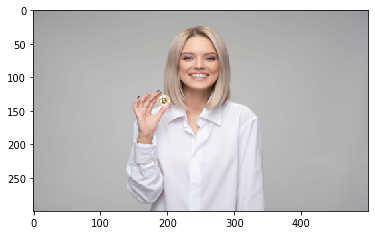

In [257]:
plt.imshow(image_head)

Note: Before Applying any segmentation apply the filter to denoise the image

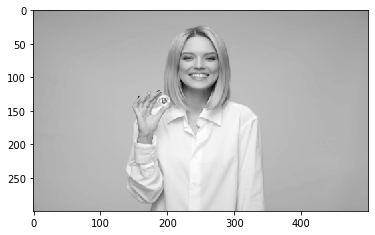

In [258]:
image_gray = color.rgb2gray(image_head)
plt.imshow(image_gray,cmap='gray')

#### 1. Active Contour Segmentation
Active Contour segmentation also called as snakes and is initialized using a user-defined contour or line, around the area of interest and this contour then slowly contracts and is attracted or repelled from light and edges.

In [259]:
# let’s draw a circle around the person’s head to initialize the snake
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]
    

In [260]:
points[0,:] # first point

array([330.,  80.])

The above calculations calculate x and y co-ordinates of the points on the periphery of the circle. Since we have given the resolution to be 200, it will calculate 200 such points.

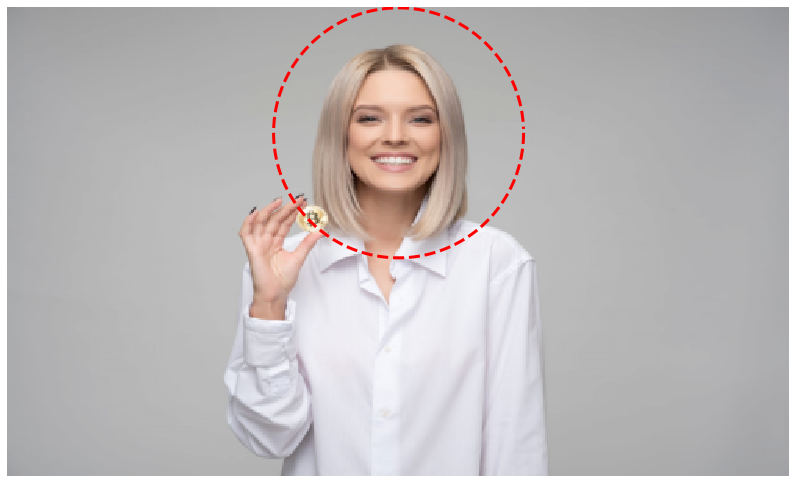

In [261]:
fig, ax = image_show(image_head)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

The algorithm then segments the face of a person from the rest of an image by fitting a closed curve to the edges of the face.

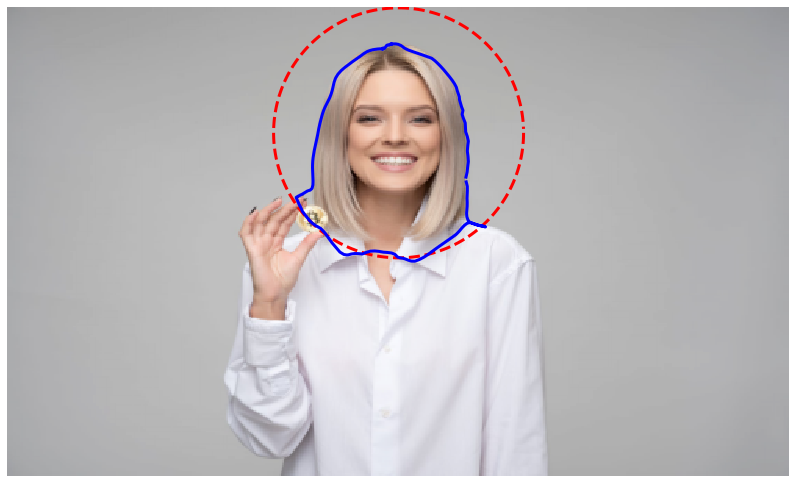

In [262]:
snake = seg.active_contour(image_gray,points)
fig, ax = image_show(image_head)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);


#### Note:
We can tweak the parameters called alpha and beta. Higher values of alpha will make this snake contract faster while beta makes the snake smoother.

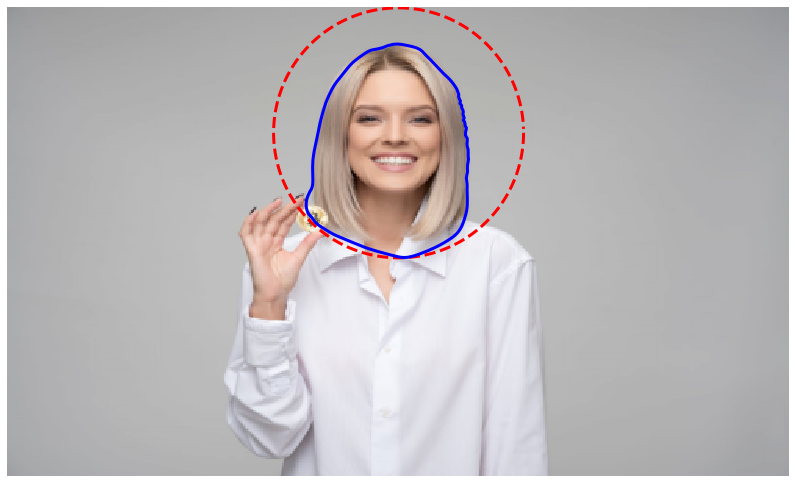

In [263]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image_head)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

#### 2. Random walker segmentation

In this method, a user interactively labels a small number of pixels which are known as labels. Each unlabeled pixel is then imagined to release a random walker and one can then determine the probability of a random walker starting at each unlabeled pixel and reaching one of the prelabeled pixels. By assigning each pixel to the label for which the greatest probability is calculated, high-quality image segmentation may be obtained. 

In [264]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

The random walker algorithm expects a label image as input. So we will have the bigger circle that encompasses the person’s entire face and another smaller circle near the middle of the face.

In [265]:
indices = draw.circle_perimeter(80, 250,20)

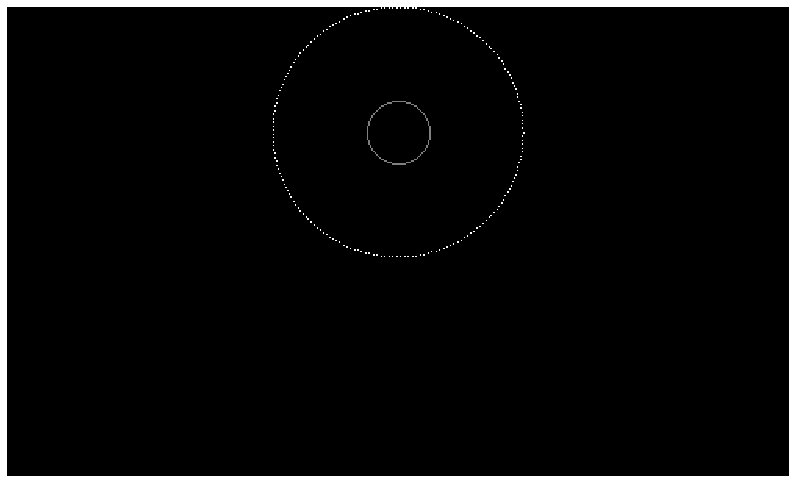

In [266]:
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

Apply Random Walker and see what happens.


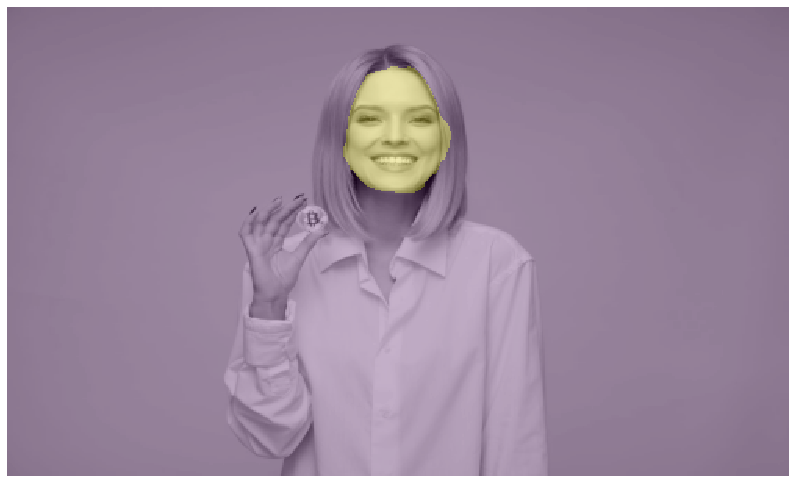

In [267]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

It doesn’t look like it’s grabbing edges as we wanted. To resolve this situation we can tune in the beta parameter until we get the desired results. After several attempts, a value of 3000 works reasonably well.

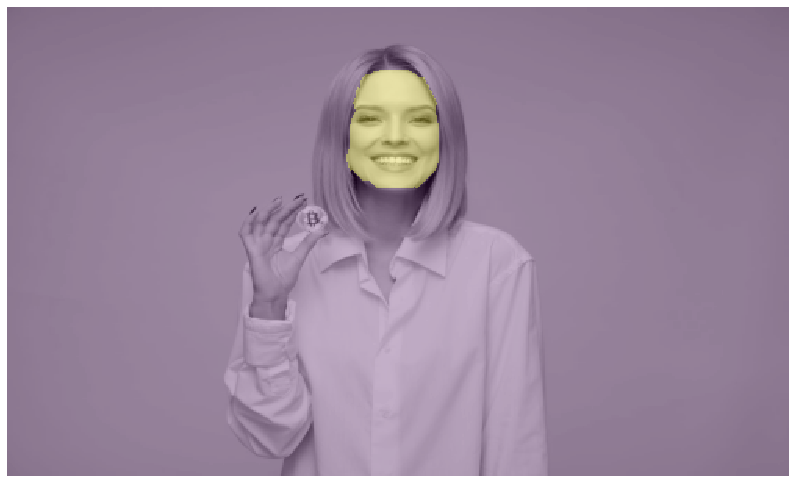

In [268]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

#### Analysis: 
That’s all for Supervised Segmentation where we had to provide certain inputs and also had to tweak certain parameters. However, it is not always possible to have a human looking at an image and then deciding what inputs to give or where to start from. Fortunately, for those situations, we have Unsupervised segmentation techniques.

### Unsupervised Segmentation:

Unsupervised segmentation requires no prior knowledge. Consider an image that is so large that it is not feasible to consider all pixels simultaneously. So in such cases, Unsupervised segmentation can breakdown the image into several sub-regions, so instead of millions of pixels, you have tens to hundreds of regions. Let’s look at two such algorithms:

#### 1. SLIC( Simple Linear Iterative Clustering)

SLIC( Simple Linear Iterative Clustering)
SLIC algorithm actually uses a machine learning algorithm called K-Means under the hood. It takes in all the pixel values of the image and tries to separate them out into the given number of sub-regions.

>> SLIC works in color so we will use the original image.

In [269]:
image_slic = seg.slic(image_head,n_segments=155)
# img_vesse

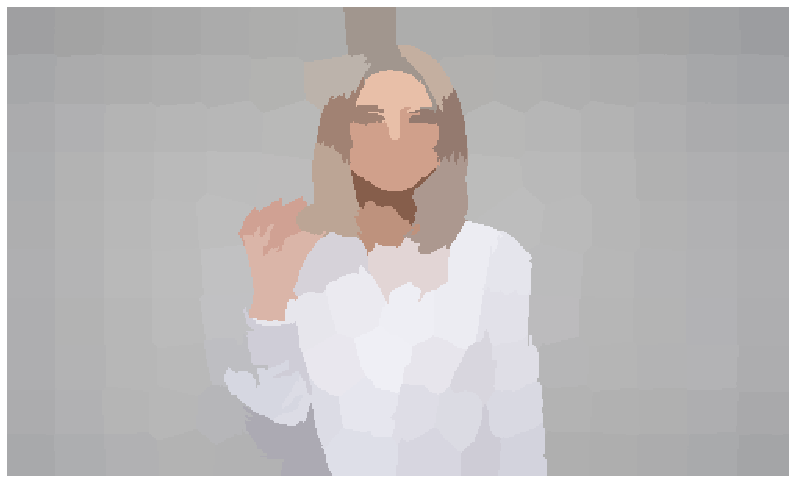

In [270]:
# label2rgb replaces each discrete label with the average interior color
image_show(color.label2rgb(image_slic, image_head, kind='avg'));

We’ve reduced this image from 512*512 = 262,000 pixels down to 155 regions.

#### 2. Felzenszwalb
This algorithm also uses a machine learning algorithm called minimum-spanning tree clustering under the hood. Felzenszwaib doesn’t tell us the exact number of clusters that the image will be partitioned into. It’s going to run and generate as many clusters as it thinks is appropriate for that
given scale or zoom factor on the image. 

http://cs.brown.edu/people/pfelzens/segment/

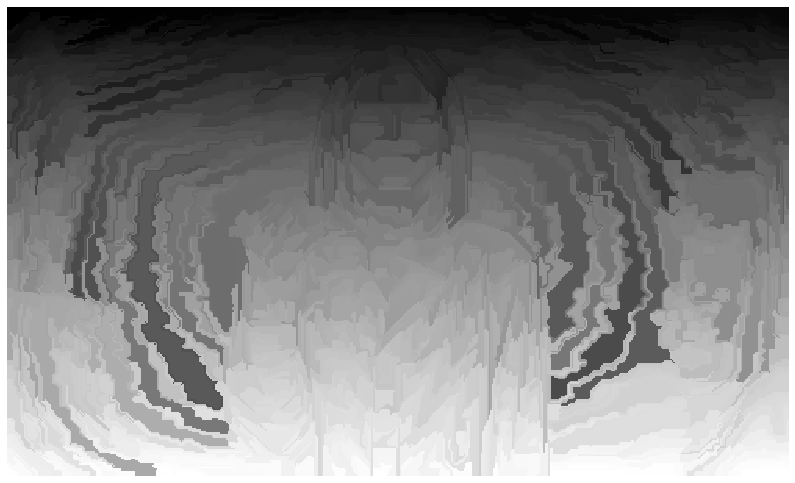

In [271]:
image_felzenszwalb = seg.felzenszwalb(image_head) 
image_show(image_felzenszwalb);

These are a lot of regions. Let’s calculate the number of unique regions.

In [272]:
np.unique(image_felzenszwalb).size

1936

Now let’s recolour them using the region average just as we did in the SLIC algorithm.

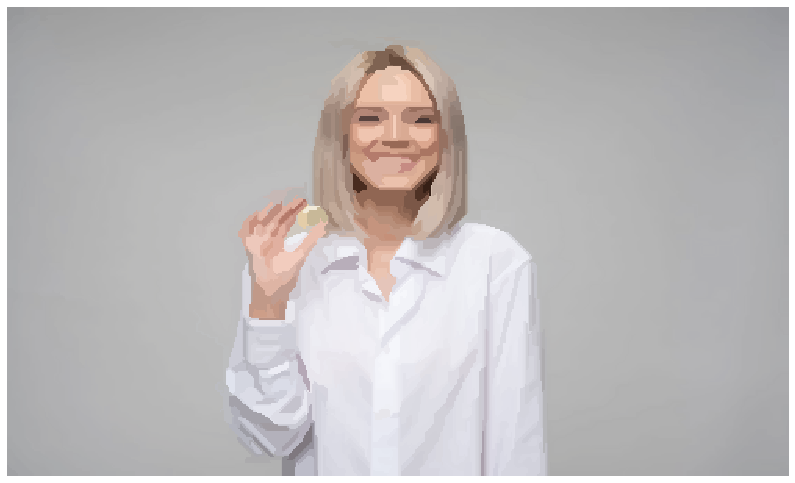

In [273]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image_head, kind='avg')
image_show(image_felzenszwalb_colored);

#### Note :
Now we get reasonable smaller regions. If we wanted still fewer regions, we could change the scale parameter or start here and combine them. This approach is sometimes called over-segmentation.

This almost looks more like a posterized image which is essentially just a reduction in the number of colours. To combine them again, you can use the Region Adjacency Graph(RAG) but that’s beyond the scope of this article.


### Conclusion
Image segmentation is a very important image processing step. It is an active area of research with applications ranging from computer vision to medical imagery to traffic and video surveillance. Python provides a robust library in the form of scikit-image having a large number of algorithms for image processing. 

https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

<------------------------------------------------------ End ------------------------------------------------>